In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from utils import make_synthetic_binary

In [ ]:
def plot_univariate_gaussians( mean_a, std_a, mean_b, std_b, sample_size=10000, bins=30):

    X, y = make_synthetic_binary(
        n_samples=10000,
        n_features=1,
        mean_a=mean_a,
        std_a=std_a,
        mean_b=mean_b,
        std_b=std_b,
        seed=42
    )

    class0 = X[y == 0, 0]
    class1 = X[y == 1, 0]

    plt.figure(figsize=(8, 5))
    plt.hist(class0, bins=bins, density=True, alpha=0.6, label=f"Class A (mean={mean_a}, std={std_a})")
    plt.hist(class1, bins=bins, density=True, alpha=0.6, label=f"Class B (mean={mean_b}, std={std_b})")

    plt.xlabel("Feature value")
    plt.ylabel("Density")
    plt.title("Overlapping Univariate Gaussians")
    plt.legend()
    plt.show()

In [ ]:
def plot_2d_gaussians(mean_a, std_a, mean_b, std_b, sample_size=10000):


    X, y = make_synthetic_binary(
        n_samples=sample_size,
        n_features=2,
        mean_a=mean_a,
        std_a=std_a,
        mean_b=mean_b,
        std_b=std_b,
        seed=42
    )
    class0 = X[y == 0]
    class1 = X[y == 1]

    plt.figure(figsize=(6, 6))
    plt.scatter(class0[:, 0], class0[:, 1], alpha=0.5, label=f"Class A (mean={mean_a}, std={std_a})", s=10)
    plt.scatter(class1[:, 0], class1[:, 1], alpha=0.5, label=f"Class B (mean={mean_b}, std={std_b})", s=10)

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Overlapping 2D Gaussians")
    plt.legend()
    plt.show()

In [ ]:

def plot_3d_gaussians(mean_a, std_a, mean_b, std_b, sample_size=10000):
    X, y = make_synthetic_binary(
        n_samples=sample_size,
        n_features=3,
        mean_a=mean_a,
        std_a=std_a,
        mean_b=mean_b,
        std_b=std_b,
        seed=42,
    )

    class0 = X[y == 0]
    class1 = X[y == 1]

    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection="3d")

    ax.scatter(class0[:, 0], class0[:, 1], class0[:, 2],
               alpha=0.5, s=8, label=f"Class A (mean={mean_a}, std={std_a})")
    ax.scatter(class1[:, 0], class1[:, 1], class1[:, 2],
               alpha=0.5, s=8, label=f"Class B (mean={mean_b}, std={std_b})")

    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Feature 3")
    ax.set_title("Overlapping 3D Gaussians")
    ax.legend(loc="upper right")

    # optional: make axes roughly equal for a nicer shape
    def _set_equal_3d(ax):
        x_limits = ax.get_xlim3d()
        y_limits = ax.get_ylim3d()
        z_limits = ax.get_zlim3d()
        x_range = x_limits[1] - x_limits[0]
        y_range = y_limits[1] - y_limits[0]
        z_range = z_limits[1] - z_limits[0]
        plot_radius = 0.5 * max(x_range, y_range, z_range)
        x_mid = 0.5 * sum(x_limits)
        y_mid = 0.5 * sum(y_limits)
        z_mid = 0.5 * sum(z_limits)
        ax.set_xlim3d([x_mid - plot_radius, x_mid + plot_radius])
        ax.set_ylim3d([y_mid - plot_radius, y_mid + plot_radius])
        ax.set_zlim3d([z_mid - plot_radius, z_mid + plot_radius])

    _set_equal_3d(ax)
    plt.show()


In [ ]:
std_a = 1.0
std_b = 1.0

mean_a = 1.0
mean_b = 2.0
plot_univariate_gaussians(mean_a, std_a, mean_b, std_b, bins=30)


In [ ]:
plot_2d_gaussians(mean_a, std_a, mean_b, std_b)

In [ ]:
plot_3d_gaussians(mean_a, std_a, mean_b, std_b)

In [22]:
files = {
    "py cpu 10M": "logs/pyxgboost/cpu_10M_20250921_002154/cpu_benchmark_detailed_times.csv",
    "py gpu 10M": "logs/pyxgboost/gpu_10M_20250920_234748/gpu_benchmark_detailed_times.csv",
    # "h2o cpu 1M": "logs_dev/h2oxgboost/cpu_1M_20250919_152021/cpu_benchmark_detailed_times.csv",
    "h2o gpu 10M": "logs/h2oxgboost/gpu_10M_20250920_233734/gpu_benchmark_detailed_times.csv",
    "h2o cpu 10M": "logs/h2oxgboost/cpu_10M_20250920_225222/cpu_benchmark_detailed_times.csv",
    
}

In [23]:
# df.head()

In [24]:
def plot_line_plots(files, column, title=""):
    for experiment, file in files.items():
        df = pd.read_csv(file)
        plt.plot(df.index, df[column], label=experiment)

    plt.legend()
    plt.title(title)
    plt.show()
    # break

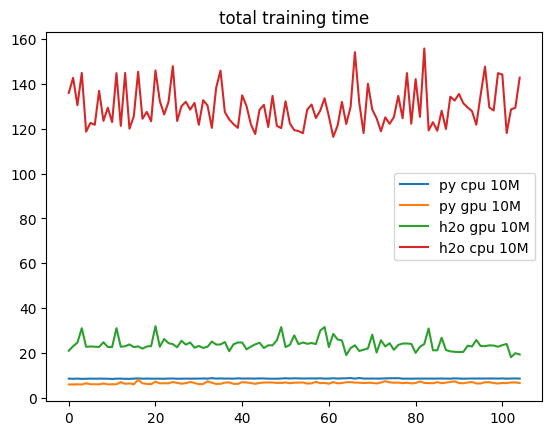

In [25]:
plot_line_plots(files, column="full_train_total_s", title="total training time")

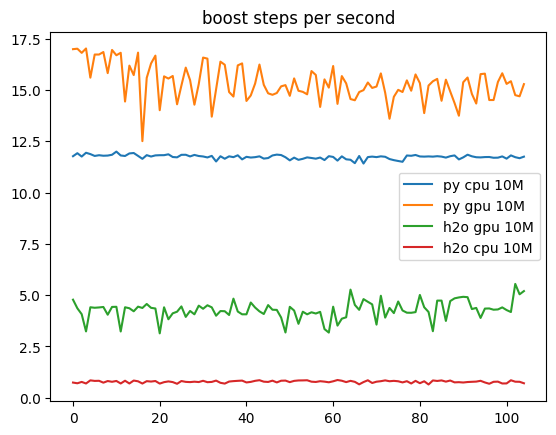

In [26]:
plot_line_plots(files, column="n_boost_per_sec", title="boost steps per second")

In [27]:
def plot_histograms(files, column, bins=30):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2x2 grid
    axes = axes.flatten()

    for idx, (experiment, file) in enumerate(files.items()):
        df = pd.read_csv(file)
        axes[idx].hist(df[column], bins=bins, alpha=0.7)
        axes[idx].set_title(f"{experiment}")
        axes[idx].set_xlabel(column)
        axes[idx].set_ylabel("frequency")

    plt.tight_layout()
    plt.show()

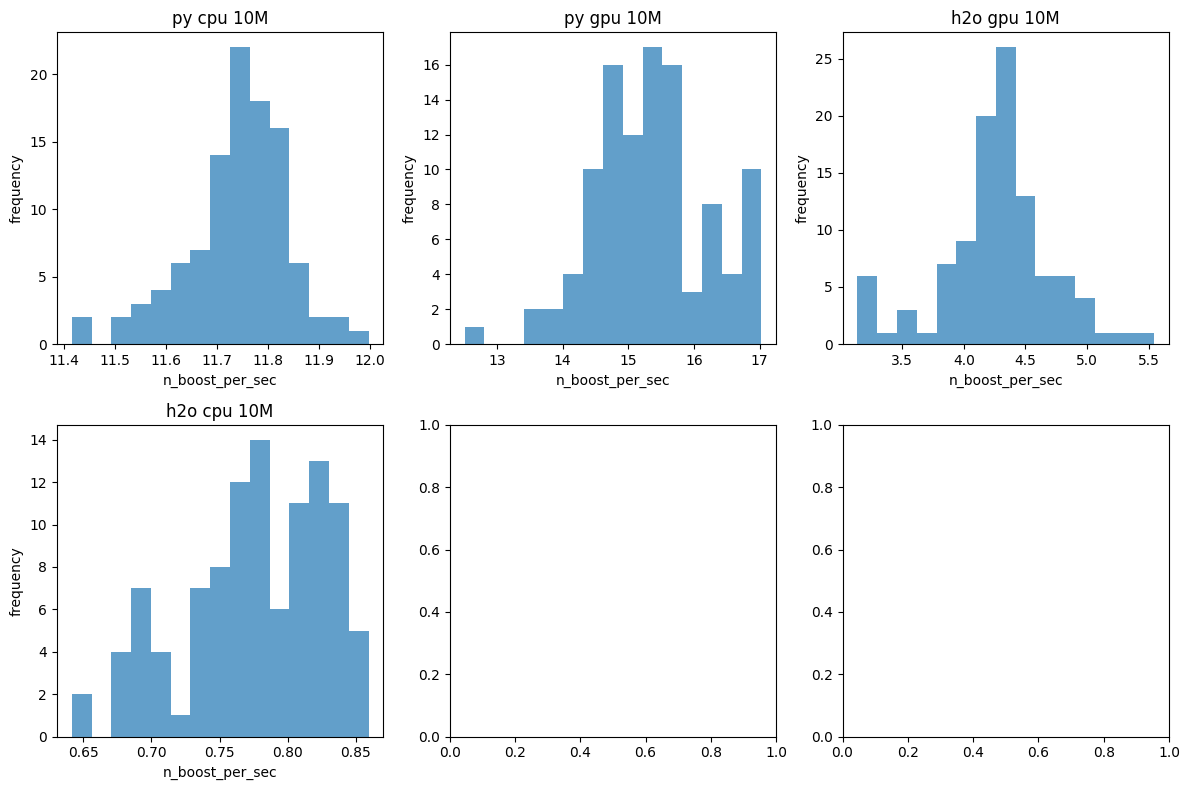

In [28]:
plot_histograms(files, "n_boost_per_sec", bins=15)